In [1]:
!pip install pandas numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('D:/programData/kaggle/titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('D:/programData/kaggle/titanic/test.csv', index_col='PassengerId')


In [4]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


# Data Meeting

In [5]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
target = train.Survived
target

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [10]:
target.isna().any()

False

In [11]:
target.loc[target==1].size/target.size

0.3838383838383838

In [12]:
train.drop('Survived', axis=1).columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

# Visualization & Data analysis

In [13]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## 1. Visualization for Numerical Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

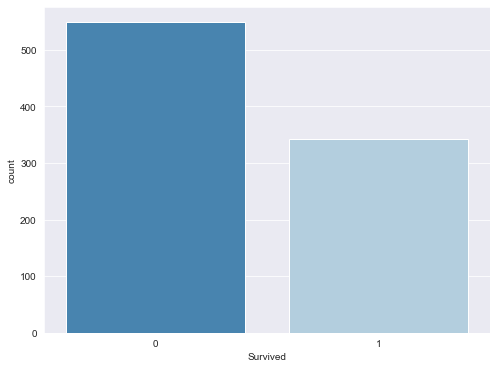

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x=train.Survived, palette='Blues_r')

In [15]:
def plot_grid(data, fig_size, grid_size, plot_type, target=''):
    fig = plt.figure(figsize=fig_size)
    if plot_type=='histplot':
        for i, column_name in enumerate(data.select_dtypes(exclude='object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.histplot(data=data[column_name], x=None, color='royalblue', kde=True, stat='count')
    
    if plot_type=='boxplot':
        for i, column_name in enumerate(data.select_dtypes(exclude='object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.boxplot(x=data[column_name], color='royalblue')
    
    if plot_type=='countplot':
        target=data[target]
        for i, column_name in enumerate(data.drop(target.name, axis=1).columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.countplot(x=data[column_name], hue=target, palette='Blues_r')
            plot.legend(loc='upper right', title=target.name)
    

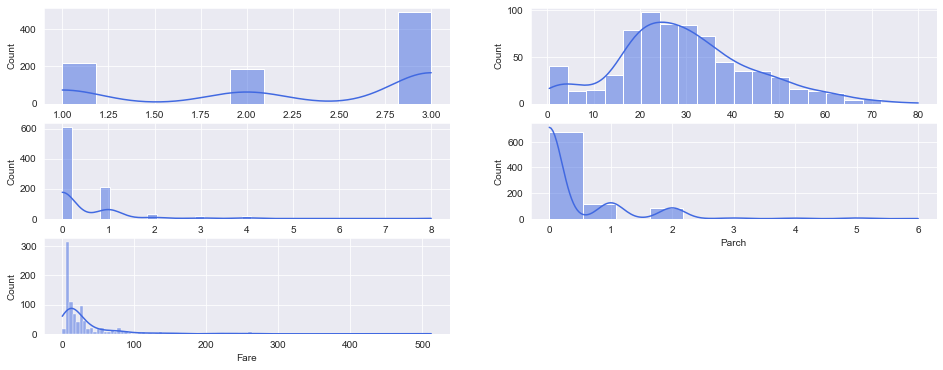

In [16]:
plot_grid(train.drop('Survived', axis=1), (16,6), (3,2), 'histplot')

In [17]:
pd.pivot_table(train, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'],
              aggfunc='mean')

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


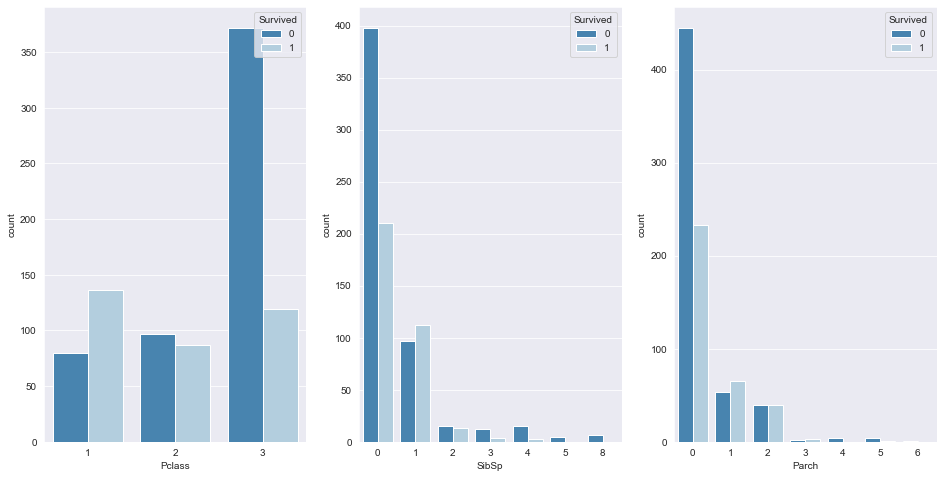

In [18]:
plot_grid(train.select_dtypes(exclude='object').drop(['Fare', 'Age'], axis=1),
         (16,8), (1,3), 'countplot', 'Survived')

In [19]:
pd.pivot_table(train, index='Survived', values=['SibSp', 'Parch','Pclass'], aggfunc=(lambda x:x.mode()))

,Parch,Pclass,SibSp
Survived,,,
0,0,3,0
1,0,1,0


In [20]:
print(f"{pd.pivot_table(train, index='Survived', columns='Pclass', values='Name', aggfunc='count')}\n\n"+
      f"{pd.pivot_table(train, index='Survived', columns='SibSp', values='Name', aggfunc='count')}\n\n"+
      f"{pd.pivot_table(train, index='Survived', columns='Parch', values='Name', aggfunc='count')}"
     )

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN

Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         233.0  65.0  40.0  3.0  NaN  1.0  NaN


<AxesSubplot:>

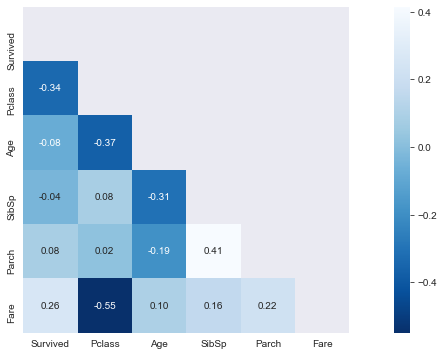

In [21]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(),
           annot=True,
           fmt='.2f',
           square=True,
            cmap='Blues_r',
           mask=np.triu(train.corr())
           )

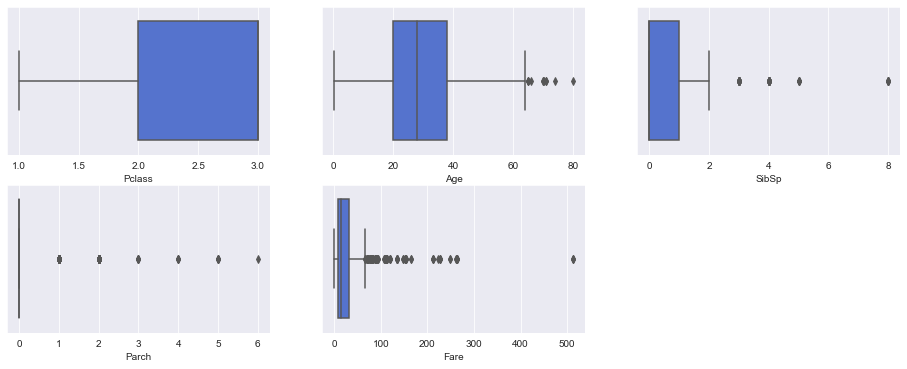

In [22]:
plot_grid(train.drop('Survived', axis=1), (16, 6), (2, 3), 'boxplot')

In [23]:
print(f"Percent of values < 1 in Parch feature: {(train.Parch[train.Parch < 1].size/ train.shape[0] * 100)}")

Percent of values < 1 in Parch feature: 76.0942760942761


## 2. Visualization for Categorical data

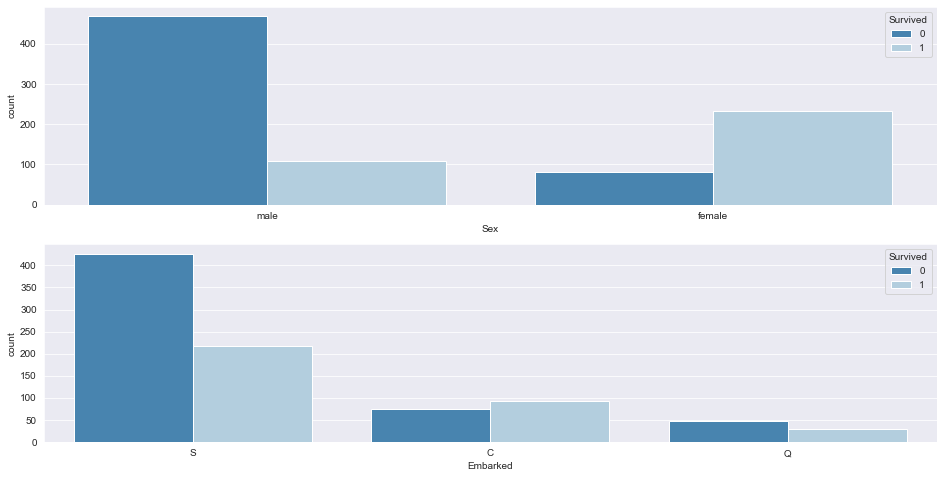

In [24]:
plot_grid(pd.concat([train.select_dtypes(include='object').drop(['Name', 'Ticket', 'Cabin'], axis=1), target], axis=1), (16, 8), (2, 1), 'countplot', 'Survived')

In [25]:
pd.concat([train.select_dtypes(include='object').drop(['Name', 'Ticket', 'Cabin'], axis=1), target], axis=1)

,Sex,Embarked,Survived
PassengerId,,,
1,male,S,0
2,female,C,1
3,female,S,1
4,female,S,1
5,male,S,0
...,...,...,...
887,male,S,0
888,female,S,1
889,female,S,0


In [26]:
print(f"{pd.pivot_table(train, index='Survived', columns='Sex', values='Name', aggfunc='count')}\n\n"+
     f"{pd.pivot_table(train, index='Survived', columns='Embarked', values='Name', aggfunc='count')}")

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [27]:
train.select_dtypes(include='object').nunique(axis=0).sort_values(ascending=False)

Name        891
Ticket      681
Cabin       147
Embarked      3
Sex           2
dtype: int64

# Data Cleaning

## 1. Deal with Null Values

In [28]:
import matplotlib
train_test = pd.concat([train.drop('Survived', axis=1), test], keys=['train', 'test'], axis=0)
missing_values = pd.concat([train_test.isna().sum(),(train_test.isna().sum()/train_test.shape[0])*100],
                          axis=1, keys=['Values missing', 'Percent of missing'])
missing_values.loc[missing_values['Percent of missing']>0].sort_values(ascending=False,  by='Percent of missing').\
style.background_gradient('Blues')

,Values missing,Percent of missing
Cabin,1014,77.463713
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394


In [29]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [30]:
train_cleaning = train.drop('Survived', axis=1).copy()
test_cleaning = test.copy()

train_cleaning['Cabin'].fillna('None', inplace=True)
test_cleaning['Cabin'].fillna('None', inplace=True)

In [31]:
age_median = train_cleaning['Age'].median()
train_cleaning['Age'].fillna(age_median, inplace=True)
age_median = test_cleaning['Age'].median()
test_cleaning['Age'].fillna(age_median, inplace=True)

In [32]:
train_cleaning['Fare'].fillna(0, inplace=True)
test_cleaning['Fare'].fillna(0, inplace=True)

In [33]:
train_cleaning['Embarked'].fillna(train_cleaning[(train_cleaning.Fare < 85) & (train_cleaning.Fare > 75) & 
                                                 (train_cleaning.Cabin.str.contains('B'))].Embarked.mode()[0], inplace = True)

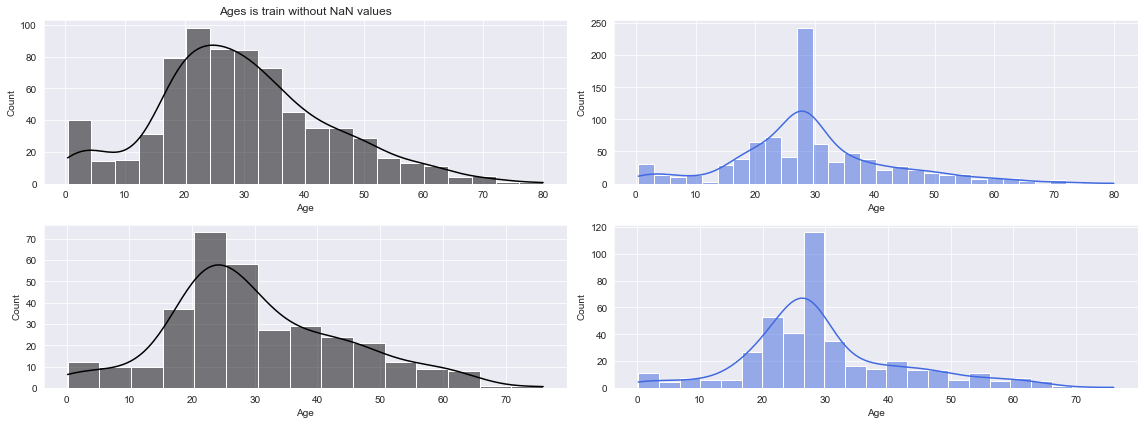

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(16, 6))

sns.histplot(train.Age, kde=True, color='black', ax= axs[0, 0])
axs[0, 0].set_title('Ages is train with NaN values')

sns.histplot(train_cleaning.Age, kde=True, color='royalblue', ax= axs[0, 1])
axs[0, 0].set_title('Ages is train without NaN values')

sns.histplot(test.Age, kde=True, color='black', ax= axs[1, 0])
axs[0, 0].set_title('Ages is train with NaN values')

sns.histplot(test_cleaning.Age, kde=True, color='royalblue', ax= axs[1, 1])
axs[0, 0].set_title('Ages is train without NaN values')

fig.tight_layout()

In [35]:
# def get_outliers(X_y, cols):
#     """
#     Custom function for dealing with outliers.
#     It takes: DataFrame of data, list of columns;
#     And it returns: list of unique indexes of outliers.(Also it outputs all outliers with indexes for each column)
#     (value is considered an outlier if absolute value of its z-score is > 3)
#     """
#     outliers_index = []
#     for col in cols:
#         right_outliers = X_y[col][(X_y[col] - X_y[col].mean()) / X_y[col].std() > 3]
#         left_outliers = X_y[col][(X_y[col] - X_y[col].mean()) / X_y[col].std() < -3]
#         all_outliers = right_outliers.append(left_outliers)
#         outliers_index += (list(all_outliers.index))
#         print('{} right outliers:\n{} \n {} left outliers:\n{} \n {} has TOTAL {} rows of outliers\n'.format(col, right_outliers, col, left_outliers, col, all_outliers.count()))
#     outliers_index = list(set(outliers_index)) # Removing duplicates
#     print('There are {} unique rows with outliers in dataset'.format(len(outliers_index)))
#     return outliers_index

In [36]:
X_y = pd.concat([train_cleaning, target], axis=1)
X_y.drop(X_y.loc[X_y.Age==80].index, axis=0, inplace=True)

In [37]:
train_cleaning = X_y.drop('Survived', axis=1).copy()
target_cleaned = X_y.Survived.copy() 

In [38]:
train_cleaning.shape[0] == target_cleaned.shape[0]

True

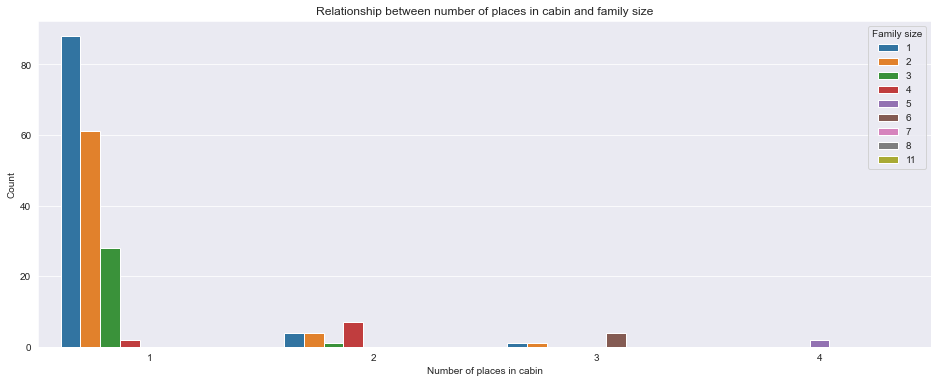

In [39]:
plt.figure(figsize=(16, 6))

plot = sns.countplot(x=train_cleaning.Cabin.loc[train_cleaning.Cabin != 'None'].str.split().\
                    apply(lambda x: len(x)), hue=(train_cleaning.SibSp+train_cleaning.Parch+1))
plot.set_title('Relationship between number of places in cabin and family size')
plot.set_xlabel('Number of places in cabin')
plot.set_ylabel('Count')
plot.legend(loc='upper right', title='Family size')

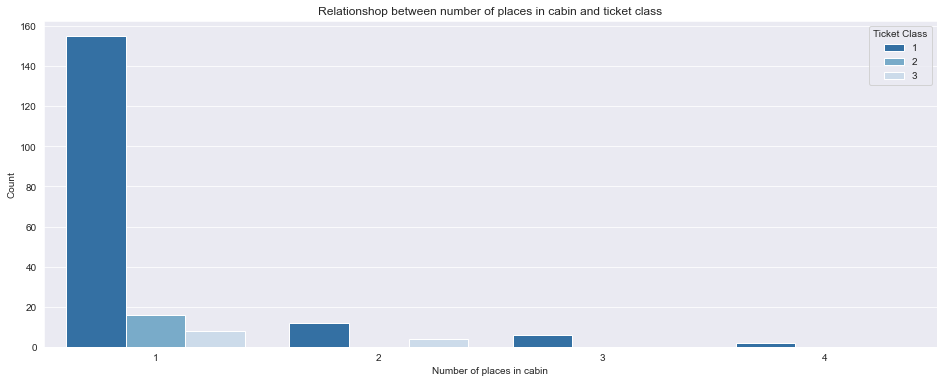

In [40]:
plt.figure(figsize=(16, 6))
plot = sns.countplot(x = train_cleaning.Cabin.loc[train_cleaning.Cabin != 'None'].str.split().apply(lambda x:len(x)), hue=train_cleaning.Pclass, palette='Blues_r')

plot.set_title('Relationshop between number of places in cabin and ticket class')
plot.set_xlabel('Number of places in cabin')
plot.set_ylabel('Count')

plot.legend(loc='upper right', title='Ticket Class')

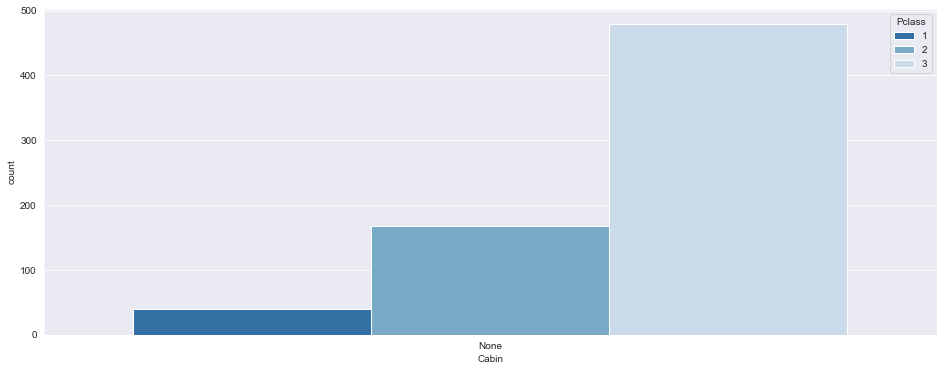

In [41]:
plt.figure(figsize=(16, 6))

plot = sns.countplot(x=train_cleaning.Cabin.loc[train_cleaning.Cabin == 'None'], hue=train_cleaning.Pclass, palette='Blues_r')

<AxesSubplot:title={'center':'Female Age distribution'}, xlabel='Age', ylabel='Count'>

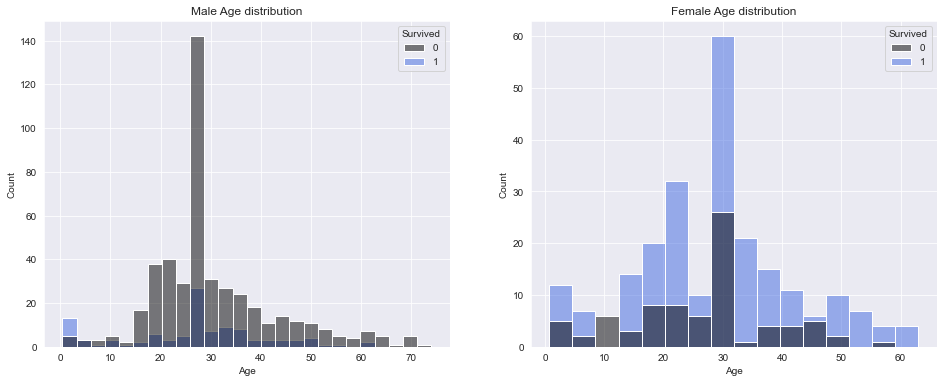

In [42]:
fig = plt.figure(figsize=(16, 6))
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Male Age distribution')
sns.histplot(x=train_cleaning.Age.loc[train_cleaning['Sex']=='male'], hue=train.Survived, palette={0: 'black', 1: 'royalblue'})

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Female Age distribution')
sns.histplot(x=train_cleaning.Age.loc[train_cleaning['Sex']=='female'], hue=train.Survived, palette={0: 'black', 1: 'royalblue'})

Text(0.5, 1.0, 'Age distribution')

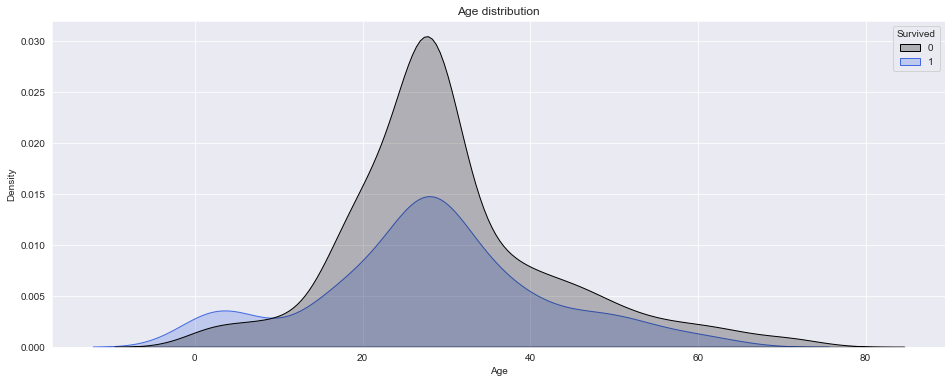

In [43]:
fig = plt.figure(figsize=(16,6))
plot = sns.kdeplot(x=train_cleaning.Age, hue=target_cleaned, palette={0: 'black', 1: 'royalblue'}, fill=True)
plot.set_title('Age distribution')

Text(0.5, 1.0, 'Relationship between Embarked and Pclass')

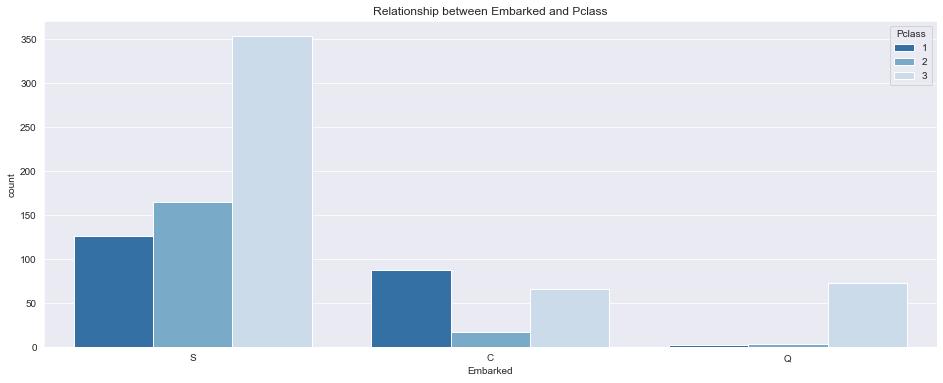

In [44]:
fig = plt.figure(figsize=(16,6))

plot = sns.countplot(data=train_cleaning, x='Embarked', hue='Pclass', palette='Blues_r')
plot.set_title('Relationship between Embarked and Pclass')

# Feature Engineering and one-hot encoding

In [45]:
train_test_cleaning = pd.concat([train_cleaning, test_cleaning], keys=['train', 'test'], axis=0)
train_test_cleaning

Pclass                                               Name  \
      PassengerId                                                              
train 1                 3                            Braund, Mr. Owen Harris   
      2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
      3                 3                             Heikkinen, Miss. Laina   
      4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
      5                 3                           Allen, Mr. William Henry   
...                   ...                                                ...   
test  1305              3                                 Spector, Mr. Woolf   
      1306              1                       Oliva y Ocana, Dona. Fermina   
      1307              3                       Saether, Mr. Simon Sivertsen   
      1308              3                                Ware, Mr. Frederick   
      1309              3                           Peter, Master. Michael J   

                      Sex   Age  SibSp  Parch              Ticket      Fare  \
      PassengerId                                                             
train 1              male  22.0      1      0           A/5 21171    7.2500   
      2            female  38.0      1      0            PC 17599   71.2833   
      3            female  26.0      0      0    STON/O2. 3101282    7.9250   
      4            female  35.0      1      0              113803   53.1000   
      5              male  35.0      0      0              373450    8.0500   
...                   ...   ...    ...    ...                 ...       ...   
test  1305           male  27.0      0      0           A.5. 3236    8.0500   
      1306         female  39.0      0      0            PC 17758  108.9000   
      1307           male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   
      1308           male  27.0      0      0              359309    8.0500   
      1309           male  27.0      1      1                2668   22.3583   

                  Cabin Embarked  
      PassengerId                 
train 1            None        S  
      2             C85        C  
      3            None        S  
      4            C123        S  
      5            None        S  
...                 ...      ...  
test  1305         None        S  
      1306         C105        C  
      1307         None        S  
      1308         None        S  
      1309         None        C  

[1308 rows x 10 columns]

In [46]:
train_test_cleaning['CabinLetter'] = train_test_cleaning.Cabin.str.split().apply(lambda x: x[-1][0].lower() if x[0] != 'None' else np.nan)

In [47]:
train_test_cleaning

Pclass                                               Name  \
      PassengerId                                                              
train 1                 3                            Braund, Mr. Owen Harris   
      2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
      3                 3                             Heikkinen, Miss. Laina   
      4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
      5                 3                           Allen, Mr. William Henry   
...                   ...                                                ...   
test  1305              3                                 Spector, Mr. Woolf   
      1306              1                       Oliva y Ocana, Dona. Fermina   
      1307              3                       Saether, Mr. Simon Sivertsen   
      1308              3                                Ware, Mr. Frederick   
      1309              3                           Peter, Master. Michael J   

                      Sex   Age  SibSp  Parch              Ticket      Fare  \
      PassengerId                                                             
train 1              male  22.0      1      0           A/5 21171    7.2500   
      2            female  38.0      1      0            PC 17599   71.2833   
      3            female  26.0      0      0    STON/O2. 3101282    7.9250   
      4            female  35.0      1      0              113803   53.1000   
      5              male  35.0      0      0              373450    8.0500   
...                   ...   ...    ...    ...                 ...       ...   
test  1305           male  27.0      0      0           A.5. 3236    8.0500   
      1306         female  39.0      0      0            PC 17758  108.9000   
      1307           male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   
      1308           male  27.0      0      0              359309    8.0500   
      1309           male  27.0      1      1                2668   22.3583   

                  Cabin Embarked CabinLetter  
      PassengerId                             
train 1            None        S         NaN  
      2             C85        C           c  
      3            None        S         NaN  
      4            C123        S           c  
      5            None        S         NaN  
...                 ...      ...         ...  
test  1305         None        S         NaN  
      1306         C105        C           c  
      1307         None        S         NaN  
      1308         None        S         NaN  
      1309         None        C         NaN  

[1308 rows x 11 columns]

In [48]:
train_test_cleaning.xs('train').groupby('Pclass').CabinLetter.apply(lambda x: x.value_counts().idxmax())

Pclass
1    c
2    f
3    g
Name: CabinLetter, dtype: object

In [49]:
train_cleaning_new = train_test_cleaning.loc['train'].copy()
test_cleaning_new = train_test_cleaning.xs('test').copy()

train_cleaning_new['CabinLetter'] = train_cleaning_new.groupby('Pclass')['CabinLetter'].\
apply(lambda x: x.fillna(x.mode()[0]))

test_cleaning_new.loc[test_cleaning_new.Pclass==1, 'CabinLetter'].fillna('c', inplace=True)
test_cleaning_new.loc[test_cleaning_new.Pclass==2, 'CabinLetter'].fillna('f', inplace=True)
test_cleaning_new.loc[test_cleaning_new.Pclass==3, 'CabinLetter'].fillna('g', inplace=True)

train_test_cleaning = pd.concat([train_cleaning_new, test_cleaning_new], keys=['train', 'test'], axis=0)

In [50]:
train_test_cleaning['NameStatus'] = train_test_cleaning.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip().lower())
train_test_cleaning['NameStatus'] = train_test_cleaning['NameStatus'].apply(lambda x: 'ms' if(x=='mlle'or x=='dr'or x=='miss'or x=='mme'or x=='mrs'or x=='lady'or x=='the countess'or x=='dona')
                                                                            else 'mr' if(x=='sir'or x=='don'or x=='major'or x=='col'or x=='rev'or x=='capt'or x=='jonkheer'or x=='master') else x)

In [51]:
train_test_cleaning['NameStatus'] 

       PassengerId
train  1              mr
       2              ms
       3              ms
       4              ms
       5              mr
                      ..
test   1305           mr
       1306           ms
       1307           mr
       1308           mr
       1309           mr
Name: NameStatus, Length: 1308, dtype: object

In [52]:
train_test_cleaning['TicketNumbers']=train_test_cleaning.Ticket.apply(lambda x: int(x) if x.isnumeric() else 0 if x == 'LINE' else int(x.split(' ')[-1]))
train_test_cleaning['TicketLetters']=train_test_cleaning.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if \
                                       len(x.split(' ')[:-1])> 0 else x.lower() if x=='LINE' else 'None')
train_test_cleaning

Pclass                                               Name  \
      PassengerId                                                              
train 1                 3                            Braund, Mr. Owen Harris   
      2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
      3                 3                             Heikkinen, Miss. Laina   
      4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
      5                 3                           Allen, Mr. William Henry   
...                   ...                                                ...   
test  1305              3                                 Spector, Mr. Woolf   
      1306              1                       Oliva y Ocana, Dona. Fermina   
      1307              3                       Saether, Mr. Simon Sivertsen   
      1308              3                                Ware, Mr. Frederick   
      1309              3                           Peter, Master. Michael J   

                      Sex   Age  SibSp  Parch              Ticket      Fare  \
      PassengerId                                                             
train 1              male  22.0      1      0           A/5 21171    7.2500   
      2            female  38.0      1      0            PC 17599   71.2833   
      3            female  26.0      0      0    STON/O2. 3101282    7.9250   
      4            female  35.0      1      0              113803   53.1000   
      5              male  35.0      0      0              373450    8.0500   
...                   ...   ...    ...    ...                 ...       ...   
test  1305           male  27.0      0      0           A.5. 3236    8.0500   
      1306         female  39.0      0      0            PC 17758  108.9000   
      1307           male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   
      1308           male  27.0      0      0              359309    8.0500   
      1309           male  27.0      1      1                2668   22.3583   

                  Cabin Embarked CabinLetter NameStatus  TicketNumbers  \
      PassengerId                                                        
train 1            None        S           g         mr          21171   
      2             C85        C           c         ms          17599   
      3            None        S           g         ms        3101282   
      4            C123        S           c         ms         113803   
      5            None        S           g         mr         373450   
...                 ...      ...         ...        ...            ...   
test  1305         None        S         NaN         mr           3236   
      1306         C105        C           c         ms          17758   
      1307         None        S         NaN         mr        3101262   
      1308         None        S         NaN         mr         359309   
      1309         None        C         NaN         mr           2668   

                  TicketLetters  
      PassengerId                
train 1                      a5  
      2                      pc  
      3                  stono2  
      4                    None  
      5                    None  
...                         ...  
test  1305                   a5  
      1306                   pc  
      1307              sotonoq  
      1308                 None  
      1309                 None  

[1308 rows x 14 columns]

In [53]:
train_test_cleaning['FamilySize'] = train_test_cleaning['SibSp'] + train_test_cleaning['Parch'] + 1
train_test_cleaning['FamilySize'] = train_test_cleaning.FamilySize.apply(lambda x: 'nofamily' if (x==1) else 'medium' if (x==2 or x==3 or x==4) else 'large')
train_test_cleaning.FamilySize

       PassengerId
train  1                medium
       2                medium
       3              nofamily
       4                medium
       5              nofamily
                        ...   
test   1305           nofamily
       1306           nofamily
       1307           nofamily
       1308           nofamily
       1309             medium
Name: FamilySize, Length: 1308, dtype: object

In [54]:
train_test_cleaning['AgeGroup'] = train_test_cleaning.Age.apply(lambda x: 'infant' if (x < 1) \
                                                               else 'child' if(x>=1 and x<=11)\
                                                               else 'teen' if(x>=12 and x<=17)\
                                                               else 'adult' if(x>=18 and x<=64)\
                                                               else 'adult+')

In [55]:
train_test_cleaning

Pclass                                               Name  \
      PassengerId                                                              
train 1                 3                            Braund, Mr. Owen Harris   
      2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
      3                 3                             Heikkinen, Miss. Laina   
      4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
      5                 3                           Allen, Mr. William Henry   
...                   ...                                                ...   
test  1305              3                                 Spector, Mr. Woolf   
      1306              1                       Oliva y Ocana, Dona. Fermina   
      1307              3                       Saether, Mr. Simon Sivertsen   
      1308              3                                Ware, Mr. Frederick   
      1309              3                           Peter, Master. Michael J   

                      Sex   Age  SibSp  Parch              Ticket      Fare  \
      PassengerId                                                             
train 1              male  22.0      1      0           A/5 21171    7.2500   
      2            female  38.0      1      0            PC 17599   71.2833   
      3            female  26.0      0      0    STON/O2. 3101282    7.9250   
      4            female  35.0      1      0              113803   53.1000   
      5              male  35.0      0      0              373450    8.0500   
...                   ...   ...    ...    ...                 ...       ...   
test  1305           male  27.0      0      0           A.5. 3236    8.0500   
      1306         female  39.0      0      0            PC 17758  108.9000   
      1307           male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   
      1308           male  27.0      0      0              359309    8.0500   
      1309           male  27.0      1      1                2668   22.3583   

                  Cabin Embarked CabinLetter NameStatus  TicketNumbers  \
      PassengerId                                                        
train 1            None        S           g         mr          21171   
      2             C85        C           c         ms          17599   
      3            None        S           g         ms        3101282   
      4            C123        S           c         ms         113803   
      5            None        S           g         mr         373450   
...                 ...      ...         ...        ...            ...   
test  1305         None        S         NaN         mr           3236   
      1306         C105        C           c         ms          17758   
      1307         None        S         NaN         mr        3101262   
      1308         None        S         NaN         mr         359309   
      1309         None        C         NaN         mr           2668   

                  TicketLetters FamilySize AgeGroup  
      PassengerId                                    
train 1                      a5     medium    adult  
      2                      pc     medium    adult  
      3                  stono2   nofamily    adult  
      4                    None     medium    adult  
      5                    None   nofamily    adult  
...                         ...        ...      ...  
test  1305                   a5   nofamily    adult  
      1306                   pc   nofamily    adult  
      1307              sotonoq   nofamily    adult  
      1308                 None   nofamily    adult  
      1309                 None     medium    adult  

[1308 rows x 16 columns]

In [56]:
train_cleaning_target_cleaned = pd.concat([train_test_cleaning.loc['train'], target_cleaned], axis=1)
train_cleaning_target_cleaned

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinLetter,NameStatus,TicketNumbers,TicketLetters,FamilySize,AgeGroup,Survived
PassengerId,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,g,mr,21171,a5,medium,adult,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,c,ms,17599,pc,medium,adult,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,g,ms,3101282,stono2,nofamily,adult,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,c,ms,113803,None,medium,adult,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,g,mr,373450,None,nofamily,adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S,f,mr,211536,None,nofamily,adult,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,b,ms,112053,None,nofamily,adult,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,None,S,g,ms,6607,wc,medium,adult,0


In [57]:
print(f"{pd.pivot_table(data=train_cleaning_target_cleaned, columns='CabinLetter', values='Name', index='Survived', aggfunc='count')}\n\n"+\
f"{pd.pivot_table(data=train_cleaning_target_cleaned,  values='TicketNumbers', index='Survived', aggfunc=(lambda x: x.mode()[0]))}\n\n"+\
f"{pd.pivot_table(data=train_cleaning_target_cleaned, columns='AgeGroup', values='Name', index='Survived', aggfunc='count')}\n\n"+\
f"{pd.pivot_table(data=train_cleaning_target_cleaned, columns='NameStatus', values='Name', index='Survived', aggfunc='count')}\n\n"+\
f"{pd.pivot_table(data=train_cleaning_target_cleaned, columns='FamilySize', values='Name', index='Survived', aggfunc='count')}\n\n")

CabinLetter    a     b     c     d     e     f      g    t
Survived                                                  
0            8.0  12.0  45.0   8.0   8.0  96.0  371.0  1.0
1            6.0  35.0  54.0  25.0  25.0  81.0  115.0  NaN

          TicketNumbers
Survived               
0                  2343
1                  1601

AgeGroup  adult  adult+  child  infant  teen
Survived                                    
0         487.0    10.0   29.0     NaN  23.0
1         280.0     NaN   32.0     7.0  22.0

NameStatus   mr   ms
Survived            
0           464   85
1           106  235

FamilySize  large  medium  nofamily
Survived                           
0              52     123       374
1              10     169       162




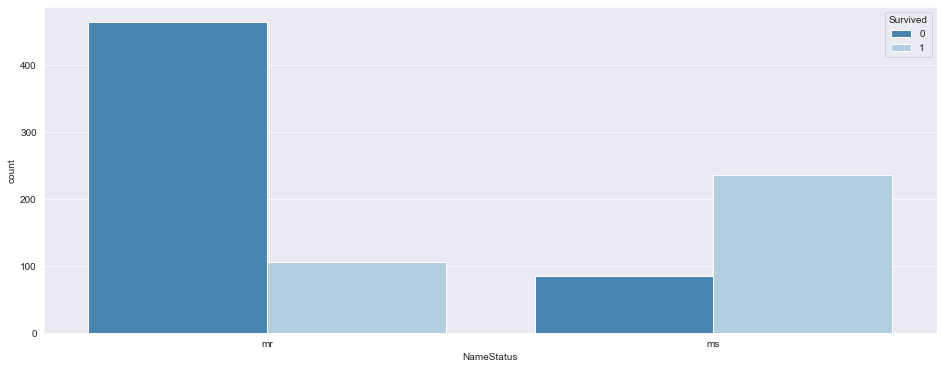

In [58]:
fig = plt.figure(figsize=(16, 6))
plot = sns.countplot(data=train_cleaning_target_cleaned, x='NameStatus', hue='Survived', palette='Blues_r')

<AxesSubplot:xlabel='TicketLetters', ylabel='count'>

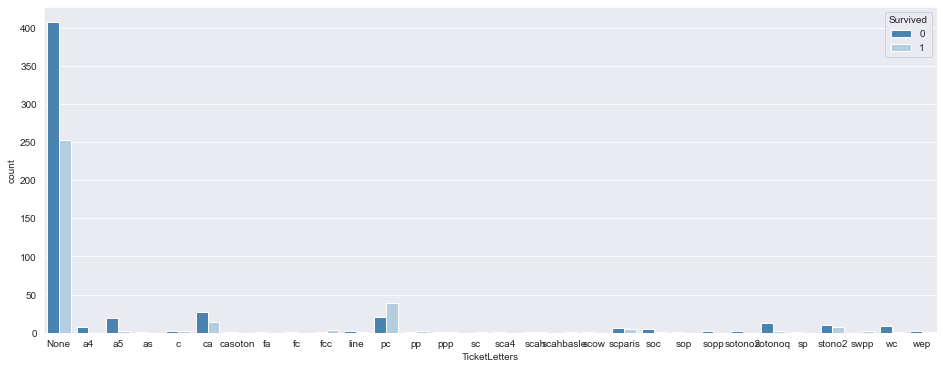

In [59]:
plt.figure(figsize = (16, 6))
sns.countplot(x = train_cleaning_target_cleaned.TicketLetters.loc[train_cleaning_target_cleaned.TicketLetters != 0].sort_values(), hue = train_cleaning_target_cleaned.Survived, 
              palette = 'Blues_r')

In [60]:
pd.pivot_table(data=train_cleaning_target_cleaned, index='Survived', columns='TicketLetters', values='Name', aggfunc='count')

TicketLetters,None,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,407.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,253.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [61]:
train_cleaning_target_cleaned.select_dtypes(include='object').nunique().sort_values(ascending=False)

Name             890
Ticket           680
Cabin            147
TicketLetters     30
CabinLetter        8
AgeGroup           5
Embarked           3
FamilySize         3
Sex                2
NameStatus         2
dtype: int64

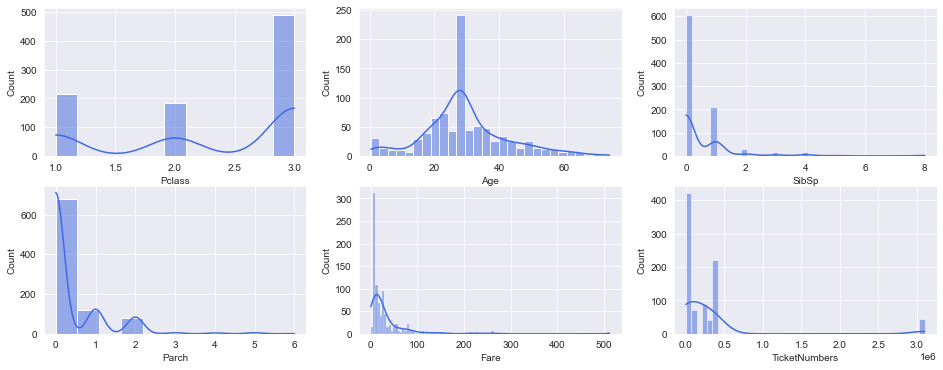

In [62]:
plot_grid(train_cleaning_target_cleaned.drop('Survived', axis=1), (16, 6), (2, 3), 'histplot')

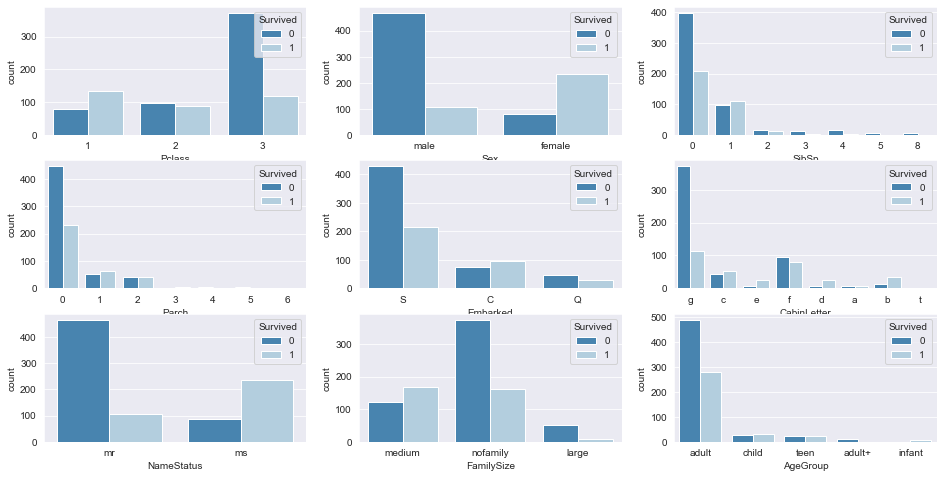

In [63]:
plot_grid(train_cleaning_target_cleaned.drop(['Name', 'Ticket', 'Cabin', 'Age', 'Fare', 'TicketNumbers', 'TicketLetters'], axis=1), (16, 8), (3, 3), 'countplot', target='Survived')

<AxesSubplot:>

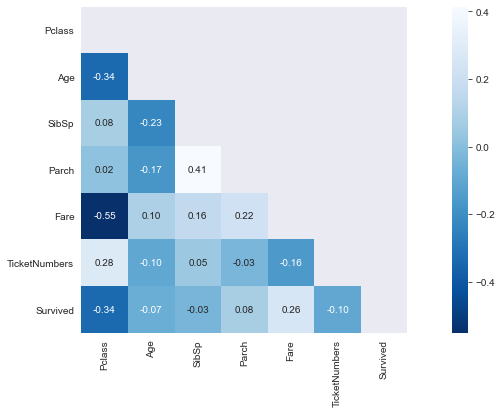

In [64]:
plt.figure(figsize=(16,6))
sns.heatmap(train_cleaning_target_cleaned.corr(),
            annot=True,
            fmt='.2f',
            square=True,
            cmap='Blues_r',
            mask=np.triu(train_cleaning_target_cleaned.corr()))

In [65]:
to_drop = [
    'Name',
    'Ticket',
    'Cabin',
    'Sex',
    'Age',
    'Parch']

train_test_cleaned = train_test_cleaning.drop(to_drop, axis=1).copy()
train_test_cleaned

Pclass  SibSp      Fare Embarked CabinLetter NameStatus  \
      PassengerId                                                            
train 1                 3      1    7.2500        S           g         mr   
      2                 1      1   71.2833        C           c         ms   
      3                 3      0    7.9250        S           g         ms   
      4                 1      1   53.1000        S           c         ms   
      5                 3      0    8.0500        S           g         mr   
...                   ...    ...       ...      ...         ...        ...   
test  1305              3      0    8.0500        S         NaN         mr   
      1306              1      0  108.9000        C           c         ms   
      1307              3      0    7.2500        S         NaN         mr   
      1308              3      0    8.0500        S         NaN         mr   
      1309              3      1   22.3583        C         NaN         mr   

                   TicketNumbers TicketLetters FamilySize AgeGroup  
      PassengerId                                                   
train 1                    21171            a5     medium    adult  
      2                    17599            pc     medium    adult  
      3                  3101282        stono2   nofamily    adult  
      4                   113803          None     medium    adult  
      5                   373450          None   nofamily    adult  
...                          ...           ...        ...      ...  
test  1305                  3236            a5   nofamily    adult  
      1306                 17758            pc   nofamily    adult  
      1307               3101262       sotonoq   nofamily    adult  
      1308                359309          None   nofamily    adult  
      1309                  2668          None     medium    adult  

[1308 rows x 10 columns]

In [66]:
train_test = pd.get_dummies(train_test_cleaned)
train_test

Pclass  SibSp      Fare  TicketNumbers  Embarked_C  \
      PassengerId                                                       
train 1                 3      1    7.2500          21171           0   
      2                 1      1   71.2833          17599           1   
      3                 3      0    7.9250        3101282           0   
      4                 1      1   53.1000         113803           0   
      5                 3      0    8.0500         373450           0   
...                   ...    ...       ...            ...         ...   
test  1305              3      0    8.0500           3236           0   
      1306              1      0  108.9000          17758           1   
      1307              3      0    7.2500        3101262           0   
      1308              3      0    8.0500         359309           0   
      1309              3      1   22.3583           2668           1   

                   Embarked_Q  Embarked_S  CabinLetter_a  CabinLetter_b  \
      PassengerId                                                         
train 1                     0           1              0              0   
      2                     0           0              0              0   
      3                     0           1              0              0   
      4                     0           1              0              0   
      5                     0           1              0              0   
...                       ...         ...            ...            ...   
test  1305                  0           1              0              0   
      1306                  0           0              0              0   
      1307                  0           1              0              0   
      1308                  0           1              0              0   
      1309                  0           0              0              0   

                   CabinLetter_c  ...  TicketLetters_wc  TicketLetters_wep  \
      PassengerId                 ...                                        
train 1                        0  ...                 0                  0   
      2                        1  ...                 0                  0   
      3                        0  ...                 0                  0   
      4                        1  ...                 0                  0   
      5                        0  ...                 0                  0   
...                          ...  ...               ...                ...   
test  1305                     0  ...                 0                  0   
      1306                     1  ...                 0                  0   
      1307                     0  ...                 0                  0   
      1308                     0  ...                 0                  0   
      1309                     0  ...                 0                  0   

                   FamilySize_large  FamilySize_medium  FamilySize_nofamily  \
      PassengerId                                                             
train 1                           0                  1                    0   
      2                           0                  1                    0   
      3                           0                  0                    1   
      4                           0                  1                    0   
      5                           0                  0                    1   
...                             ...                ...                  ...   
test  1305                        0                  0                    1   
      1306                        0                  0                    1   
      1307                        0                  0                    1   
      1308                        0                  0                    1   
      1309                        0                  1                    0   

                   AgeGroup_adult  AgeGroup_adult+

In [67]:
X_train_full, X_test = train_test.xs('train'), train_test.xs('test')
Y_train_full = target_cleaned

# Creating Model

In [68]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

In [71]:
def test_estimators(X, y, estimators, labels, cv):
    '''
    A function for testing multiple estimators.
    It takes: X: train data, y: target, estimators: list of estimators,
              labels: names of estimators,
              cv: cross validation splitting strategy;
    And it returns: a DataFrame of table with results of tests
    '''
    
    result_table = pd.DataFrame()
    row_index = 0
    for est, label in zip(estimators, labels):
        est_name = label
        result_table.loc[row_index, 'Model Name'] = est_name
        
        cv_results = cross_validate(est, X, y, cv=cv, n_jobs=-1)
        
        result_table.loc[row_index, 'Test accuracy'] = cv_results['test_score'].mean()
        result_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        result_table.loc[row_index, 'Fit Time'] = cv_results['fit_time'].mean()
        
        row_index += 1
    
    result_table.sort_values(by=['Test accuracy'], ascending=False, inplace=True)
    
    return result_table

In [73]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
svc = make_pipeline(StandardScaler(), SVC(probability = True))
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

estimators = [lr, dt, rf, svc, knn]
labels =['Log Regression', 'Decision Tree', 'Random Forest', 'SVC', 'KNN']

results = test_estimators(X_train_full, Y_train_full, estimators, labels, cv=10)
results.style.background_gradient(cmap='Blues')

,Model Name,Test accuracy,Test Std,Fit Time
2,Random Forest,0.825843,0.034173,0.388384
3,SVC,0.816854,0.025149,0.342503
1,Decision Tree,0.802247,0.024719,0.015606
4,KNN,0.792135,0.031481,0.013042
0,Log Regression,0.616854,0.020380,0.018599


## Parameter tuning

In [75]:
rf_params = {'random_state': [1],
             'max_depth': [10, 11, 12], # feature 수의 30-50%
             'max_features': [18], 
             'n_estimators': [113], # 트리의 갯수로 [50, 100, 300, 500]으로 시작했다가 점점 좁혀 나간다.
             'min_samples_leaf': [1, 2], # 최소 leaf 갯수
             'min_samples_split': [2, 5, 10]} #최소 split 갯수

grid = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1)
grid.fit(X_train_full, Y_train_full)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12], 'max_features': [18],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 10], 'n_estimators': [113],
                         'random_state': [1]})

In [79]:
grid.best_params_

6

In [81]:
rf = RandomForestClassifier(**grid.best_params_)

cv_results = cross_val_score(rf, X_train_full, Y_train_full, cv=10)

print(f'All results: {cv_results}\n\n'+
      f'Mean: {cv_results.mean()}\n\n'+
      f'Std: {cv_results.std()}\n\n')


All results: [0.80898876 0.84269663 0.7752809  0.85393258 0.87640449 0.87640449
 0.87640449 0.87640449 0.88764045 0.85393258]

Mean: 0.852808988764045

Std: 0.03387598523973335




In [82]:
rf.fit(X_train_full, Y_train_full)
predictions = rf.predict(X_test)

In [85]:
submission = pd.DataFrame({'PassengerId': X_test.index, 'Survived': predictions})
submission.to_csv('submission.csv', index=False)